In [145]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import gzip
from astropy.modeling import models, fitting
from photutils.detection import find_peaks

In [211]:
spitz_fits=fits.open('r50571520/ch1/pbcd/SPITZER_I1_50571520_0000_2_A50697690_munc.fits' )
spitz_fits.info()
spitz_image=spitz_fits[0].data
#Replace all nans with 0
spitz_image=np.nan_to_num(spitz_image, nan=0.0)

Filename: r50571520/ch1/pbcd/SPITZER_I1_50571520_0000_2_A50697690_munc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     132   (2587, 1531)   float32   


Max Intensity value: 0.045497857
MIn Intensity value: 0.0


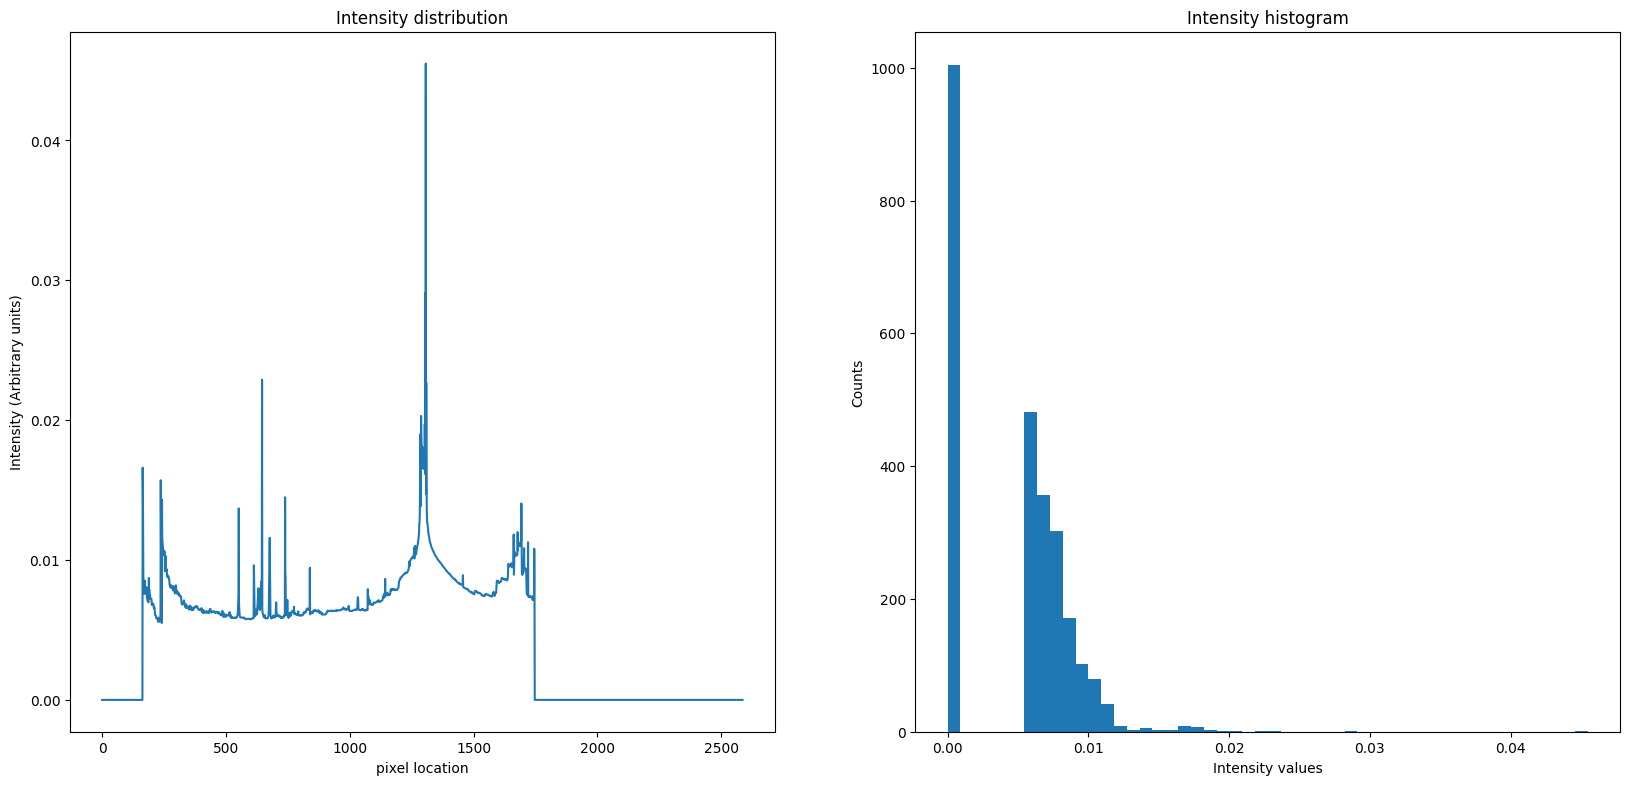

In [212]:
#A routine to check the intensity distribution
intensity_check=np.mean(np.nan_to_num(spitz_image, nan=0.0), axis=0)
max_intensity=np.max(intensity_check)
min_intensity=np.min(intensity_check)

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.xlabel('pixel location')
plt.ylabel('Intensity (Arbitrary units)')
plt.title('Intensity distribution')
plt.plot(intensity_check)
plt.subplot(2,2,2)
plt.xlabel('Intensity values')
plt.ylabel('Counts')
plt.title('Intensity histogram')
plt.hist(intensity_check, bins=50)
print('Max Intensity value:',max_intensity)
print('MIn Intensity value:',min_intensity)

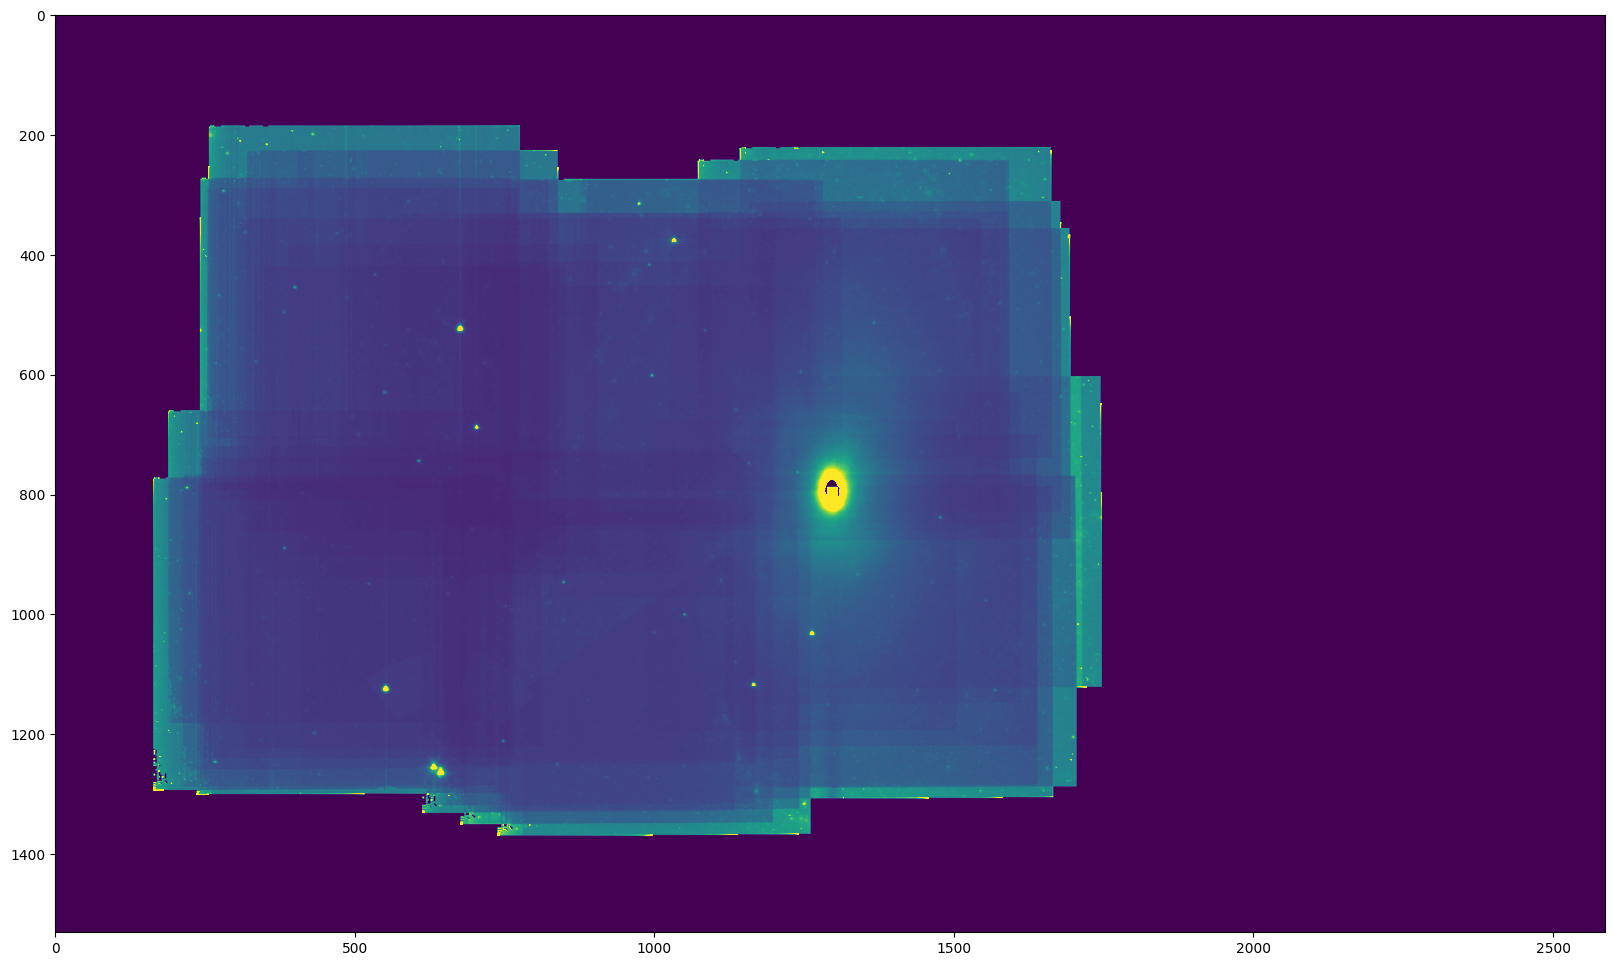

In [199]:
plt.figure(figsize=(20,20))
plt.imshow(spitz_image,cmap='viridis', vmax=max_intensity, vmin=min_intensity)

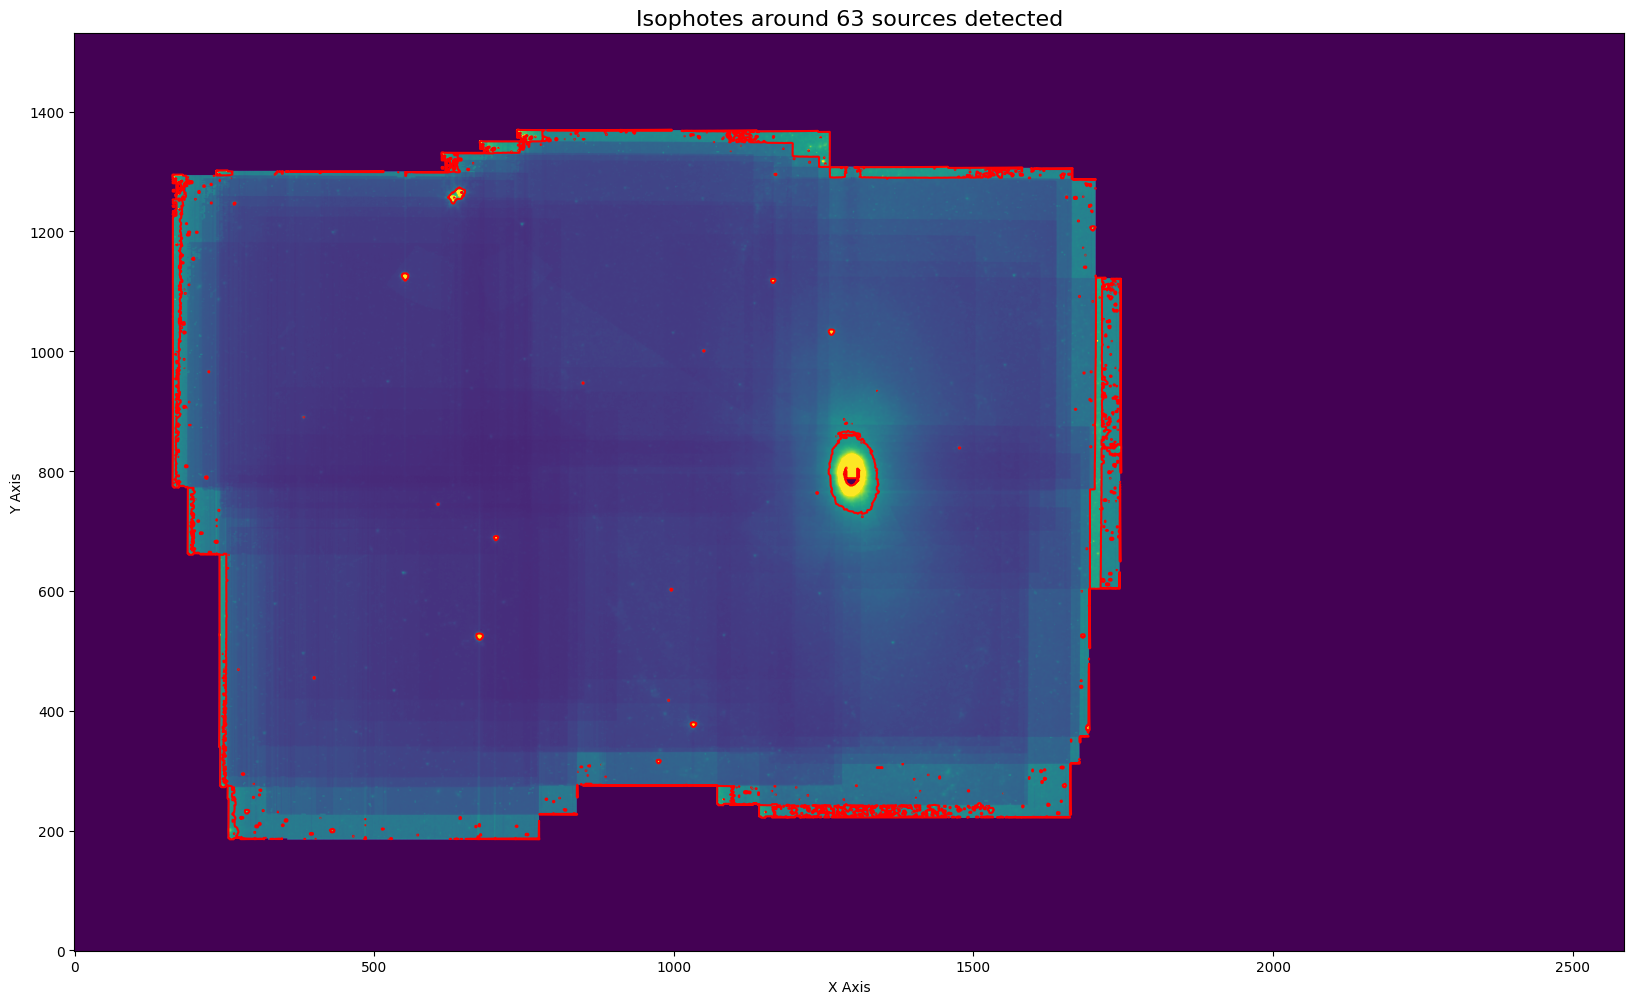

In [210]:
# Find the peaks (galaxy locations) in the image
peaks_tbl = find_peaks(spitz_image, 
                       threshold=max_intensity-(max_intensity-min_intensity)/2, 
                       box_size=100) #The thresh is max val of intensity above which detect peaks
#You can change it to just max_intensity as well
# Extract the (x, y) coordinates and intensity levels of the detected peaks
galaxy_coords = np.transpose((peaks_tbl['x_peak'], peaks_tbl['y_peak']))
galaxy_intensity = peaks_tbl['peak_value']


plt.figure(figsize=(20,20))
#Create a contour plot (isophotes) around the galaxy locations
plt.imshow(spitz_image, cmap='viridis', origin='lower',vmax=max_intensity,
           vmin=min_intensity)
# Set the contour levels to match the intensity of the galaxies
contour_levels = np.linspace(min(galaxy_intensity), max(galaxy_intensity), num=10)
# Plot the contours around the galaxy locations
plt.contour(spitz_image, levels=contour_levels, colors='red', alpha=1.0)
# Set labels, title, and show the plot
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Isophotes around {} sources detected'.format(len(galaxy_coords)), fontsize=16)
plt.show()
